In [2]:
import os
import os.path as op

import numpy as np
import pandas as pd

In [3]:
def merge_excel():
    path = os.path.join(os.path.dirname(os.getcwd()), 'data')
    file_list = [op.join(path,file) for file in os.listdir(path) if file.endswith('.xlsx')]
    file_list.sort()
    
    df_total = pd.DataFrame()

    for file in file_list:
        print('Processing %s' %file.split('/')[-1])
        excel_file = pd.ExcelFile(file)
        sheets = excel_file.sheet_names
        for sheet in sheets:
            # print('Processing %s' %sheet)
            df = excel_file.parse(sheet_name = sheet, na_values='')
            df_total = pd.concat([df_total,df])
            print(df_total.shape)

    df_total.columns = df_total.columns.str.lower()
    df_total['date'] = np.where(df_total['report date'].isna(),df_total['date'],df_total['report date'])
    df_total['route'] = np.where(df_total['route'].isna(), df_total['line'], df_total['route'])
    df_total['gap'] = np.where(df_total['min gap'].isna(), df_total['gap'], df_total['min gap'])
    df_total['delay'] = np.where(df_total['min delay'].isna(), df_total['delay'], df_total['min delay'])
    df_total['direction'] = np.where(df_total['direction'].isna(), df_total['bound'], df_total['direction'])

    df_total = df_total[['date','time', 'day','route','location','incident', 'delay','gap',
                         'direction', 'vehicle', 'incident id']].copy()
    
    df_total.to_csv('../data/data_merged.csv', index=None)
    

In [4]:
merge_excel()

Processing ttc-streetcar-delay-data-2014.xlsx
(319, 10)
(497, 10)
(1775, 10)
(2957, 10)
(3921, 10)
(5080, 10)
(6086, 10)
(7117, 10)
(8298, 10)
(9291, 10)
(10153, 10)
(11027, 10)
Processing ttc-streetcar-delay-data-2015.xlsx
(12268, 10)
(13936, 10)
(14984, 10)
(15932, 10)
(16801, 10)
(17796, 10)
(18689, 10)
(19661, 10)
(20795, 10)
(21726, 10)
(22487, 10)
(23248, 10)
Processing ttc-streetcar-delay-data-2016.xlsx
(24431, 10)
(25526, 10)
(26713, 10)
(27832, 10)
(28974, 10)
(30052, 10)
(31030, 10)
(32098, 10)
(33134, 10)
(34330, 10)
(35749, 10)
(37269, 10)
Processing ttc-streetcar-delay-data-2017.xlsx
(38569, 10)
(39680, 10)
(40780, 10)
(41835, 10)
(43097, 10)
(44321, 10)
(45288, 10)
(46181, 10)
(47157, 10)
(48189, 10)
(49333, 10)
(51031, 10)
Processing ttc-streetcar-delay-data-2018.xlsx
(52653, 10)
(53940, 10)
(55052, 10)
(56341, 10)
(57885, 10)
(59483, 10)
(60717, 10)
(62189, 10)
(63386, 10)
(64546, 10)
(65729, 10)
(66643, 10)
Processing ttc-streetcar-delay-data-2019.xlsx
(68238, 10)
(696

In [6]:
# Loading dataset
file_path = os.path.abspath(os.path.join(os.getcwd(), "../data", "data_merged.csv"))
df = pd.read_csv(file_path)

# Drop the 'incident id' column
df = df.drop(columns=['incident id'])

# Rename columns
df = df.rename(columns={
    'date': 'report_date',
    'delay': 'min_delay',
    'gap': 'min_gap'
})

# Save the modified dataframe to a new CSV file
output_path = os.path.abspath(os.path.join(os.getcwd(), "../data", "modified_ttc_streetcar_delay_dataset.csv"))
df.to_csv(output_path, index=False)

print("Columns renamed and 'Incident ID' dropped successfully!")

/var/folders/sc/nfh2wgvx14s9px_npllyrb_w0000gn/T/ipykernel_11095/961299783.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Columns renamed and 'Incident ID' dropped successfully!


In [7]:
file_path = os.path.abspath(os.path.join(os.getcwd(), "../data", "modified_ttc_streetcar_delay_dataset.csv"))

# Load the modified dataset
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows to understand the structure of the data
print("\nFirst few rows of the dataset:")
print(df.head())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

# Check the distribution of categorical variables (e.g., 'day', 'location', 'direction')
print("\nUnique values in categorical columns:")
print(df[['day', 'location', 'direction']].nunique())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145126 entries, 0 to 145125
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   report_date  145126 non-null  object 
 1   time         145126 non-null  object 
 2   day          145126 non-null  object 
 3   route        144692 non-null  object 
 4   location     144862 non-null  object 
 5   incident     145125 non-null  object 
 6   min_delay    145047 non-null  float64
 7   min_gap      145005 non-null  float64
 8   direction    134576 non-null  object 
 9   vehicle      140441 non-null  float64
dtypes: float64(3), object(7)
memory usage: 11.1+ MB
None

First few rows of the dataset:
  report_date      time       day  route                        location  \
0  2014-01-02  06:31:00  Thursday  505.0         Dundas and Roncesvalles   
1  2014-01-02  12:43:00  Thursday  504.0                   King and Shaw   
2  2014-01-02  14:01:00  Thursday  501.0 

/var/folders/sc/nfh2wgvx14s9px_npllyrb_w0000gn/T/ipykernel_11095/89544254.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [26]:
# Fill missing categorical values
df['route'] = df['route'].fillna(df['route'].mode()[0])
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['incident'] = df['incident'].fillna(df['incident'].mode()[0])
df['direction'] = df['direction'].fillna('Unknown')
df['vehicle'] = df['vehicle'].fillna(0)

# Fill missing numerical values
df['min_delay'] = df['min_delay'].fillna(df['min_delay'].median())
df['min_gap'] = df['min_gap'].fillna(df['min_gap'].median())

# Confirm that there are no missing values left
print(df.isnull().sum())

report_date    0
time           0
day            0
route          0
location       0
incident       0
min_delay      0
min_gap        0
direction      0
vehicle        0
dtype: int64


In [14]:
# Get unique values from the 'incident' column
print(df['incident'].unique())

['Late' 'Utilized Off Route' 'Held By' 'Investigation' 'Mechanical'
 'General Delay' 'Emergency Services' 'Diversion' 'Overhead' 'Security'
 'Operations' 'Collision - TTC Involved' 'Cleaning' 'Rail/Switches'
 'Management']


In [ ]:
# Define a mapping for merging the values within the 'incident' column
merge_mapping = {
    'Late Leaving Garage': 'Late',
    'Late': 'Late',
    'e': 'Late',
    'Late  ': 'Late',
    'Late Entering Service': 'Late',
    'Overhead - Pantograph': 'Overhead',
    'Overhead': 'Overhead',
    'Cleaning': 'Cleaning',
    'Cleaning - Unsanitary': 'Cleaning',
    'Cleaning - Disinfection': 'Cleaning'
}

# Apply the mapping to the 'incident' column
df['incident'] = df['incident'].replace(merge_mapping)

# Display unique incidents after merging
print("Unique incidents after merging:")
print(df['incident'].unique())

Unique incidents after merging:
['Late' 'Utilized Off Route' 'Held By' 'Investigation' 'Mechanical'
 'General Delay' 'Emergency Services' 'Diversion' 'Overhead' 'Security'
 'Operations' 'Collision - TTC Involved' 'Cleaning' 'Rail/Switches'
 'Management']


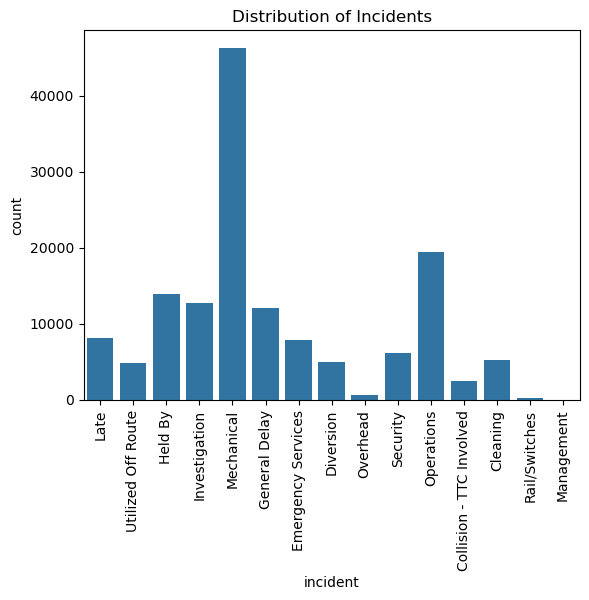

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for distribution of incidents
sns.countplot(data=df, x='incident')
plt.title('Distribution of Incidents')
plt.xticks(rotation=90)
plt.show()

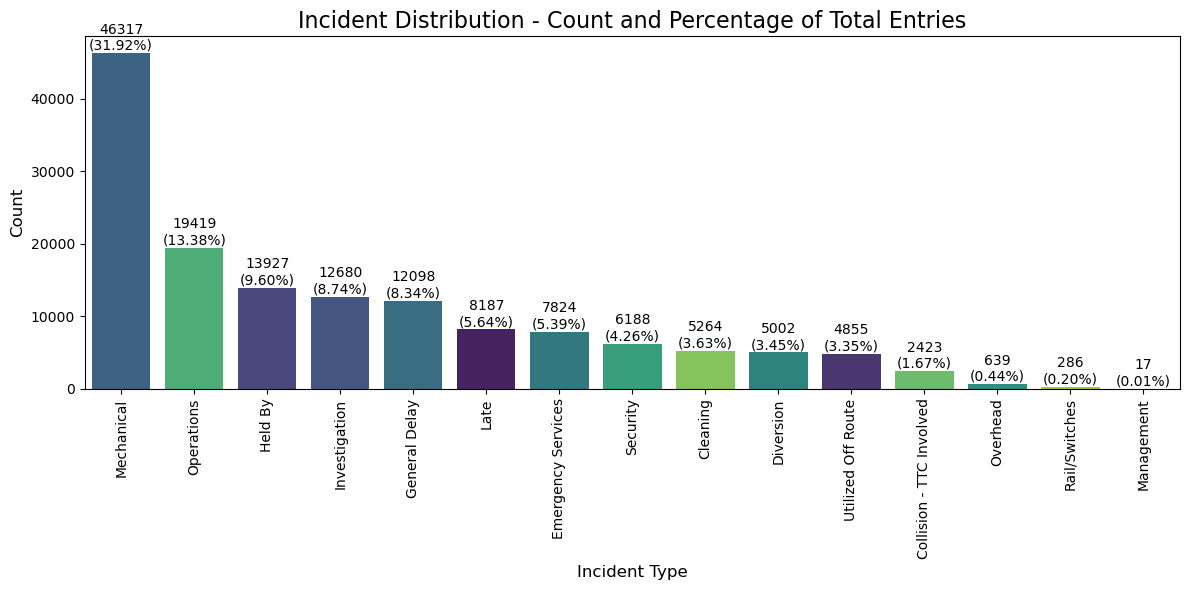

In [29]:
# Get the total number of entries in the dataset (RangeIndex size)
total_entries = len(df)

# Sort incidents by frequency
incident_order = df['incident'].value_counts().index

# Calculate the count and percentage for each incident type
incident_counts = df['incident'].value_counts()
incident_percentages = (incident_counts / total_entries) * 100

# Plot for distribution of incidents (Count)
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df, 
    x='incident', 
    order=incident_order,
    hue='incident',  # Assign the 'incident' variable to hue
    palette='viridis'  # Adding color back to the bars
)

# Set labels and title
plt.title('Incident Distribution - Count and Percentage of Total Entries', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Incident Type', fontsize=12)
plt.xticks(rotation=90)

# Add both count and percentage annotations on bars
for p in ax.patches:
    height = p.get_height()
    incident_type = p.get_x() + p.get_width() / 2.  # Position of the text
    count = int(height)
    percentage = (height / total_entries) * 100
    ax.annotate(
        f'{count}\n({percentage:.2f}%)', 
        (incident_type, height + 50),  # Adjusted to place text above the bar
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()